# Wrangling #WeRateDogs Twitter Data: _A Udacity Project_

## Loading Libraries

Here you can see the libraries I will need to make sure I can properly finish this project. I had to install tweepy and requests to make sure that I could even load all of these libraries also.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns
import re
import warnings

%matplotlib inline

## I. Data Gathering

I will be gathering data from three separate places and creating comparable dataframes for each. The data I will be pulling from includes: 

* twitter-archive-enhanced.csv
* image-predictions.tsv
* Twitter's API

These data sets will help me later on when I start getting to the assessment portion of this project. So I will be spending some time make sure I'm pulling the correct information, and then making sure I clean the data thoroughly afterwards.

### A) Pulling Twitter Archived Enhanced Data

In [2]:
# creating a dataframe for twitter-archive-enhanced.csv
tea = pd.read_csv('twitter-archive-enhanced.csv')
tea.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### B) Pulling Twitter's Image Prediction Data

In [3]:
# creating a folder
name = 'Twitter_Image_Predictions'
if not os.path.exists(name):
    os.makedirs(name)
    
# using requests to download "image_predictions.tsv" programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# writing a tsv file
with open(os.path.join(name, 
                      url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# opening tsv file and creating a new dataframe for it
p_images = pd.read_csv(name + '/image-predictions.tsv', sep = '\t')
p_images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### C) Calling from Twitter's API

In [5]:
# calling on Twitter's API via API KEYS
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
oauth_token = 'HIDDEN'
oauth_token_secret = 'HIDDEN'

In [6]:
# pulling from the tweepy library
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(oauth_token, oauth_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
tweet_ids = tea.tweet_id.values

In [8]:
count = 0

fails_dict = {}

start = timer()
# saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

        end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [9]:
# displaying errors
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

In [10]:
# extract tweet_json.txt file data
api_tweets = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        for line in json_file:
            data = json.loads(line)
            api_tweets.append({'tweet_id' :  data['id'], 'retweet_count' : data['retweet_count'], 'favorite_count' : data['favorite_count']})

In [11]:
api = pd.DataFrame(api_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

api.to_csv('tweet_json.txt', encoding = 'utf-8', index = False)

In [12]:
api.head()

tweet_id  retweet_count  favorite_count
0  892177421306343426           5497           30368
1  891815181378084864           3633           22830
2  891689557279858688           7556           38352
3  891327558926688256           8141           36632
4  891087950875897856           2728           18467

### D) Data Gathering Conclusion

I have successfully created dataframes for the following sets of data:
* Twitter-Enhanced-archive.csv is now _`tea`_
* image-predictions.tsc is now _`p_images`_
* Created _`api`_ dataframe that calls from a tweet_json.txt file and Twitter's API.

## II. Data Assessment

Now that I've gathered the necessary data, I can start assessing it for any quality issues and any tidiness issues. As far as I can tell this data is in serious need of a clean up, so I need to make sure I accurately assess each data frame! 

In [13]:
# displaying maximum rows and columns to be able to properly see all of the data
pd.set_option('display.max_columns', 17)
pd.set_option('display.max_rows', 2356)

### Assessing _`tea`_ DataFrame

In [14]:
tea

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

#### A) Visual Assessment:

   * Quality Assessment:
        1. The names column has inconsistencies (**_showing names like: a, an, the, etc._**)
        2. There are some columns that are unnecessary as (**`in_reply_to_status_id`, `in_reply_user_id`, `retweeted_status_id`, `retweeted_user_id`, and `retweeted_status_timestamp_`**).
        3. The ratings do not match the #WeRateDogs parameters:
            * **The rating denominators are not all 10.
    
    
   * Tidiness Assessment: **None at the moment.**


#### B) Programatic Assessment:

In [15]:
# displaying tea dataframe information
tea.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [16]:
tea.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [17]:
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
tea.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
Sadie               8
the                 8
Daisy               7
an                  7
Toby                7
Bailey              7
Buddy               7
Oscar               6
Rusty               6
Koda                6
Leo                 6
Milo                6
Stanley             6
Scout               6
Jack                6
Jax                 6
Bella               6
Dave                6
Larry               5
Gus                 5
Finn                5
Louis               5
Phil                5
Oakley              5
George              5
Sunny               5
Chester             5
Sammy               5
Bentley             5
Alfie               5
very                5
Beau                4
Loki                4
Winnie              4
Clarence  

In [19]:
tea.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
tea.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [21]:
tea.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#####  ***_Assessment:_***

* **Quality Assessment:**
    1. Missing `expanded_urls` data
    2. Not all of the names in the `names` column are actually names
    3. There are some denominators in the `rating_denominators` column that don't follow the "out of 10" rule
    4. Delete columns that are unnecessary: `in_reply_to_status_id`, `in_reply_user_id`, `retweeted_status_id`, `retweeted_user_id`, and `retweeted_status_timestamp_`
    5. Tweet Id should be a string, not an **int64**


* **Tidiness Assessment:**
    1. `doggo`, `floofer`, `pupper`, and `puppo` should be combined into a single column
        * The datatype should also change to categorical

### Assessing _`p_images`_ DataFrame

In [22]:
p_images

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

#### A) Visual Assessment:

* **Quality Assessment:**
    1. Dog breeds in columns `p1`, `p2`, and `p3` have underscores and are inconsistently capitalized
    
        
* **Tidiness Assessment:**
    1. Looks like the table would be easier to visualize if the image predictions were grouped into a single column.

#### B) Programatic Assessment:

In [23]:
p_images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [24]:
p_images.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [25]:
p_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### ***_Assessment_***

* **Quality Assessment:**
    1. Remove the underscore and properly capitalize dog breeds in `p1`, `p2`, and `p3`


* **Tidiness Assessment:**
    1. `p1`, `p2`, and `p3` should be merged into one catagorical variable column 


### Assessing _`api`_ DataFrame

In [26]:
api

tweet_id  retweet_count  favorite_count
0     892177421306343426           5497           30368
1     891815181378084864           3633           22830
2     891689557279858688           7556           38352
3     891327558926688256           8141           36632
4     891087950875897856           2728           18467
5     890971913173991426           1765           10743
6     890729181411237888          16516           59060
7     890609185150312448           3780           25417
8     890240255349198849           6401           28981
9     890006608113172480           6425           27988
10    889880896479866881           4359           25437
11    889665388333682689           8760           43672
12    889638837579907072           3913           24552
13    889531135344209921           1976           13837
14    889278841981685760           4653           22907
15    888917238123831296           3926           26526
16    888804989199671297           3710           23288
17    888554962724278272           3023           17954
18    888078434458587136           3039           19857
19    887705289381826560           4724           27597
20    887517139158093824          10299           42221
21    887473957103951883          15733           62474
22    887343217045368832           9226           30648
23    887101392804085760           5221           27937
24    886983233522544640           6679           31649
25    886736880519319552           2780           10885
26    886680336477933568           3921           20486
27    886366144734445568           2772           19229
28    886267009285017600              3             108
29    886258384151887873           5533           25479
30    886054160059072513             96               0
31    885984800019947520           5878           29671
32    885528943205470208           5589           32740
33    885518971528720385           3270           18652
34    885311592912609280          16180               0
35    885167619883638784           3832           19941
36    884925521741709313          15807           69992
37    884876753390489601           4897           25326
38    884562892145688576           4114           22139
39    884441805382717440           4989           24717
40    884247878851493888          17790           65969
41    884162670584377345           2621           18594
42    883838122936631299           2992           19907
43    883482846933004288           8647           41716
44    883360690899218434           3222           20658
45    883117836046086144           5804           33754
46    882992080364220416           3395           21758
47    882762694511734784           4278           25717
48    882627270321602560           5308           25538
49    882268110199369728          10141           40766
50    882045870035918850           4259           26696
51    881906580714921986           2981           22194
52    881666595344535552           9351           46164
53    881633300179243008              7             115
54    881536004380872706          14036           45058
55    881268444196462592           4657           21222
56    880935762899988482           2446           15586
57    880872448815771648           3351           19410
58    880465832366813184           5450           25914
59    880221127280381952           3637           24537
60    880095782870896641           3812           25173
61    879862464715927552           3048           20394
62    879674319642796034             10             289
63    879492040517615616           2777           21422
64    879415818425184262          39163           96284
65    879376492567855104           2745           15379
66    879130579576475649           5988               0
67    879050749262655488           4133           20565
68    879008229531029506           2350           17353
69    878776093423087618           3609           17709
70    878604707211726852           6204 

#### A) Visual Assessment:

   * **Quality Assessment:**
       1. Looks like there are less rows in this dataset than there are in the **`tea`** data set.
        
        
   * **Tidiness Assessment:** None at the moment.
    
    

#### B) Programatic Assessment:

In [27]:
api.head(5)

tweet_id  retweet_count  favorite_count
0  892177421306343426           5497           30368
1  891815181378084864           3633           22830
2  891689557279858688           7556           38352
3  891327558926688256           8141           36632
4  891087950875897856           2728           18467

In [28]:
api.tail(5)

tweet_id  retweet_count  favorite_count
2325  666049248165822465             38              94
2326  666044226329800704            122             260
2327  666033412701032449             39             107
2328  666029285002620928             41             118
2329  666020888022790149            444            2346

In [29]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### ***_Assessment_***

* **Quality Assessment:** None at the moment


* **Tidiness Assessment:** None at the moment

## III. Cleaning the Data

### ***Data Assessment Summary:***

#### _`tea`_ dataframe:
*  **Quality Assessment:**
    1. Missing `expanded_urls` data
    2. Not all of the names in the `names` column are actually names
    3. There are some denominators in the `rating_denominators` column that don't follow the "out of 10" rule, I must fix those
    4. I will fix the numerators that are also greater than 15 and less than 10, as this does not follow the same parameters as #WeRateDogs's rating system
    5. Getting rid of unnecessary data: `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`
    6. Tweet Id should be a string, not an **int64**
    7. Nameless dogs should be NaN and not none


* **Tidiness Assessment:**
    1. `doggo`, `floofer`, `pupper`, and `puppo` should be combined into a single column

#### _`p_images`_ dataframe:
* **Quality Assessment:**
    8. Remove the underscore and properly capitalize dog breeds in `p1`, `p2`, and `p3`


* **Tidiness Assessment:**
    2. `p1`, `p2`, and `p3` should be merged into one catagorical variable column 
    3. Must merge this dataset with  `tea`


#### _`api`_ dataframe:
* **Quality Assessment:**
None

* **Tidiness Assessment:**
    4. Must merge this dataset with merged `p_image` and `tea` datasets
    



#### **Tidiness Clean**

**First I need to make copies of each dataset.**

In [30]:
# making copies of each dataframe
tea_clean = tea.copy()
clean_p_images = p_images.copy()
api_clean = api.copy()

1. ***Tidiness Assessment # 3:*** Merging `tea_clean` and `clean_p_images`
    * **Define**: First, I'll combine our first two datasets
    * **Code**: Use the merge function for `tea_clean` and `clean_p_images`

In [31]:
# merging tea_clean and clean_p_images datasets
wrd_clean = pd.merge(tea_clean, clean_p_images, how = 'inner', on = 'tweet_id')

In [32]:
wrd_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id  ...   p1_conf p1_dog        p2   p2_conf p2_dog  \
0                       NaN  ...  0.097049  False     bagel  0.085851  False   
1                       NaN  ...  0.323581   True  Pekinese  0.090647   True   

         p3   p3_conf p3_dog  
0    banana  0.076110  False  
1  papillon  0.068957   True  

[2 rows x 28 columns]

In [33]:
wrd_clean.tail(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2073  666029285002620928                    NaN                  NaN   
2074  666020888022790149                    NaN                  NaN   

                      timestamp  \
2073  2015-11-15 23:05:30 +0000   
2074  2015-11-15 22:32:08 +0000   

                                                 source  \
2073  <a href="http://twitter.com/download/iphone" r...   
2074  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2073  This is a western brown Mitsubishi terrier. Up...                  NaN   
2074  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id  ...   p1_conf p1_dog                  p2  \
2073                       NaN  ...  0.506826   True  miniature_pinscher   
2074                       NaN  ...  0.465074   True              collie   

       p2_conf p2_dog                   p3   p3_conf p3_dog  
2073  0.074192   True  Rhodesian_ridgeback  0.072010   True  
2074  0.156665   True    Shetland_sheepdog  0.061428   True  

[2 rows x 28 columns]

In [34]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

2. ***Tidiness Assessment # 4:*** Merging `wrd_clean` and `api_clean`
    * **Define**: First, I'll combine our first merged dataset and `api_clean`
    * **Code**: Use the merge function for `wrd_clean` and `api_clean`

In [35]:
# merging tea_clean and clean_p_images datasets
wrd_clean = pd.merge(wrd_clean, api_clean, how = 'inner', on = 'tweet_id')

In [36]:
wrd_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892177421306343426                    NaN                  NaN   
1  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 00:17:27 +0000   
1  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Tilly. She's just checking pup on you....                  NaN   
1  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id  ...        p2   p2_conf  p2_dog        p3  \
0                       NaN  ...  Pekinese  0.090647    True  papillon   
1                       NaN  ...  malamute  0.078253    True    kelpie   

    p3_conf p3_dog retweet_count favorite_count  
0  0.068957   True          5497          30368  
1  0.031379   True          3633          22830  

[2 rows x 30 columns]

In [37]:
wrd_clean.tail(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2056  666029285002620928                    NaN                  NaN   
2057  666020888022790149                    NaN                  NaN   

                      timestamp  \
2056  2015-11-15 23:05:30 +0000   
2057  2015-11-15 22:32:08 +0000   

                                                 source  \
2056  <a href="http://twitter.com/download/iphone" r...   
2057  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2056  This is a western brown Mitsubishi terrier. Up...                  NaN   
2057  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id  ...                  p2   p2_conf  p2_dog  \
2056                       NaN  ...  miniature_pinscher  0.074192    True   
2057                       NaN  ...              collie  0.156665    True   

                       p3   p3_conf p3_dog retweet_count favorite_count  
2056  Rhodesian_ridgeback  0.072010   True            41            118  
2057    Shetland_sheepdog  0.061428   True           444           2346  

[2 rows x 30 columns]

In [38]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

> Now that all of my data is in one place, I'm going to start with the low hanging fruit. Tidying up these columns because there are way too many!

3. ***Tidiness Assessment # 2:*** Merging `p1`, `p2`, and `p3` columns into a new `dog_breed` column, and dropping `p1_dogs`, `p1_conf`, `p2_dogs`, `p2_conf`, `p3_dogs`, `p3_conf` columns.
    * **Define**: I need to combine `p1`, `p2`, and `p3` into one column name it `dog_breed` and drop the other columns that would then be unnecessary.
    * **Code**: 
        * Using the picture prediction to fill in newly defined function `dog_breed`. Using drop function for `p1`, `p2`, `p3`, `p1_dogs`, `p1_conf`, `p2_dogs`, `p2_conf`, `p3_dogs`, `p3_conf`
        * Change the datatype to category

In [39]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [40]:
# defining p_breed to later help merge
def p_breed(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

wrd_clean['dog_breed'] = wrd_clean.apply(p_breed, axis  = 1)

In [41]:
wrd_clean = wrd_clean.drop(columns = ['p1', 'p2', 'p3',
                                     'p1_dog', 'p2_dog', 'p3_dog',
                                     'p1_conf','p2_conf','p3_conf'])

In [42]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [43]:
wrd_clean.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892177421306343426                    NaN                  NaN   
1  891815181378084864                    NaN                  NaN   
2  891689557279858688                    NaN                  NaN   
3  891327558926688256                    NaN                  NaN   
4  891087950875897856                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 00:17:27 +0000   
1  2017-07-31 00:18:03 +0000   
2  2017-07-30 15:58:51 +0000   
3  2017-07-29 16:00:24 +0000   
4  2017-07-29 00:08:17 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Tilly. She's just checking pup on you....                  NaN   
1  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
2  This is Darla. She commenced a snooze mid meal...                  NaN   
3  This is Franklin. He would like you to stop ca...                  NaN   
4  Here we have a majestic great white breaching ...                  NaN   

   retweeted_status_user_id  ... floofer pupper  puppo  \
0                       NaN  ...    None   None   None   
1                       NaN  ...    None   None   None   
2                       NaN  ...    None   None   None   
3                       NaN  ...    None   None   None   
4                       NaN  ...    None   None   None   

                                           jpg_url img_num retweet_count  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg       1          5497   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg       1          3633   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg       1          7556   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg       2          8141   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg       1          2728   

  favorite_count                 dog_breed  
0          30368                 Chihuahua  
1          22830                 Chihuahua  
2          38352        Labrador_retriever  
3          36632                    basset  
4          18467  Chesapeake_Bay_retriever  

[5 rows x 22 columns]

4. ***Tidiness Assessment # 1:*** Change the datatype to category `doggo`, `floofer`, `pupper`, and `puppo` should be combined into a single column, replace None with empty space, then drop the excess columns
    * **Define**:
    * **Code**:
        1. Use the replace function 
        2. Using the str.extract function to make one column
        3. Drop excess columns

In [44]:
# replacing None with empty space
wrd_clean.doggo.replace('None', '', inplace = True) # for doggo column
wrd_clean.floofer.replace('None', '', inplace = True) # for floofer column
wrd_clean.pupper.replace('None', '', inplace = True) # for pupper column
wrd_clean.puppo.replace('None', '', inplace = True) # for puppo column

In [45]:
# extracting variables to make dog_stage column
wrd_clean['dog_stage'] = wrd_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# formating dog_stage with multiple stages which appeared like doggopupper
wrd_clean.loc[wrd_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
wrd_clean.loc[wrd_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
wrd_clean.loc[wrd_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [46]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [47]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [48]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

#### **Quality Clean**

> I've tidied up my dataset, and now its time to give some good old quality cleaning!

1. ***Quality Assessment #8:*** Remove the underscore and properly capitalize dog breeds in `dog_breeds`
    * **Define**: remove the underscores and properly capitalize the dog breed names
    * **Code**: use Series.str.replace to remove the underscore from dog breeds, and then use Series.str.capitalize to make sure everything is properly capitalized

In [49]:
# removing the underscores
wrd_clean['dog_breed'] = wrd_clean['dog_breed'].str.replace('_', " ")

In [50]:
wrd_clean.dog_breed.value_counts()

golden retriever                  173
Labrador retriever                110
Pembroke                           95
Chihuahua                          93
pug                                65
toy poodle                         51
chow                               51
Samoyed                            45
Pomeranian                         42
malamute                           34
cocker spaniel                     33
Chesapeake Bay retriever           31
French bulldog                     30
miniature pinscher                 26
Cardigan                           23
Eskimo dog                         22
beagle                             21
German shepherd                    21
Shih-Tzu                           20
Siberian husky                     20
Staffordshire bullterrier          20
Rottweiler                         19
Lakeland terrier                   19
kuvasz                             19
Shetland sheepdog                  19
Maltese dog                        19
basset      

In [51]:
# capitalizing dog breeds
wrd_clean['dog_breed'] = wrd_clean['dog_breed'].str.title()

In [52]:
wrd_clean.dog_breed.value_counts()

Golden Retriever                  173
Labrador Retriever                110
Pembroke                           95
Chihuahua                          93
Pug                                65
Chow                               51
Toy Poodle                         51
Samoyed                            45
Pomeranian                         42
Malamute                           34
Cocker Spaniel                     33
Chesapeake Bay Retriever           31
French Bulldog                     30
Miniature Pinscher                 26
Cardigan                           23
Eskimo Dog                         22
German Shepherd                    21
Beagle                             21
Staffordshire Bullterrier          20
Shih-Tzu                           20
Siberian Husky                     20
Rottweiler                         19
Kuvasz                             19
Lakeland Terrier                   19
Maltese Dog                        19
Shetland Sheepdog                  19
Basset      

2. ***Quality Assessment #6:*** `tweet Id` should be a string, not an **int64**
    * **Define**: Change the `tweet_id` dtype from **int64** to a **str**
    * **Code**: use the **astype**  and apply functions to change `tweet_id` from an int64 to a str.

In [53]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [54]:
# changing tweet_id datatype
wrd_clean['tweet_id'].astype(str)

0       892177421306343426
1       891815181378084864
2       891689557279858688
3       891327558926688256
4       891087950875897856
5       890971913173991426
6       890729181411237888
7       890609185150312448
8       890240255349198849
9       890006608113172480
10      889880896479866881
11      889665388333682689
12      889638837579907072
13      889531135344209921
14      889278841981685760
15      888917238123831296
16      888804989199671297
17      888554962724278272
18      888078434458587136
19      887705289381826560
20      887517139158093824
21      887473957103951883
22      887343217045368832
23      887101392804085760
24      886983233522544640
25      886736880519319552
26      886680336477933568
27      886366144734445568
28      886258384151887873
29      885984800019947520
30      885528943205470208
31      885311592912609280
32      885167619883638784
33      884925521741709313
34      884876753390489601
35      884562892145688576
36      884441805382717440
3

In [55]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

In [56]:
wrd_clean['tweet_id'] = wrd_clean['tweet_id'].apply(str)

In [57]:
wrd_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                         int64
retweet_count                   int64
favorite_count                  int64
dog_breed                      object
dog_stage                      object
dtype: object

3. ***Quality Assessment #7:*** Nameless dogs should be NaN and not none
    * **Define**: We've got clean up the names that are listed as none
    * **Code**: 
         1. Check for incorrect names using the list function
         2. Define a new function that renames 'None' to 'NaN'

In [58]:
# listing names to see which ones are incorrect
list(wrd_clean.name)

['Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 '

In [59]:
# defining new function to change 'None' to 'NaN'
def no_names(row): 
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']
    
# applying the called function by columns
wrd_clean['name'] = wrd_clean.apply(no_names, axis = 1)

# replacing 'None with NaN
wrd_clean['name'].replace('None', np.nan, inplace = True)

In [60]:
list(wrd_clean.name)

['Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 nan,
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,
 'Cooper',
 nan,
 'Harold',
 'Shikha',
 na

4. ***Quality Assessment #2:*** Not all of the names in the `names` column are actually names
    * **Define**: Need to find missing names in `names` column
    * **Code**: 
        1. Define a new function to help search for missing names from a text column
        2. Drop rows with missing names

In [61]:
def name_search(ns):
    ledger = []
    for line in ns['text']:
        fstring = line.find('.')
        if fstring == -1:
            ledger.append(np.NaN)
        else:
            bstring = line[:fstring].rsplit(' ', 1)[-1]
            if bstring == bstring.title():
                wstring = ['This', 'Setter', 'Parthenon', '37',
                           'Up', 'Oh', 'St', 'Rhododendron', 'Yep',
                           'Improvement', 'Unbelievable', 'Airport',
                           'Xbox', 'Tortoise', 'Pulitzer', 'We',
                           'Christmas', 'Islands', 'Epispocalian']
                if (len(bstring) > 15) or any(word in bstring for word in wstring) or any(c for c in bstring if c not in string.ascii_letters + "'") or (len(bstring) < 2):
                    ledger.append(np.NaN)
                else:
                    ledger.append(bstring)
            else:
                ledger.append(np.NaN)
    return ledger

In [62]:
# calling from ledger to help search names
ledger = name_search(wrd_clean)
wrd_clean.name = ledger

In [63]:
wrd_clean.name.value_counts()

Charlie           12
Oliver            11
Cooper            10
Tucker            10
Penny              9
Winston            8
Daisy              8
Lucy               8
Lola               8
Sadie              6
Rusty              6
Bella              6
Bo                 6
Toby               6
Milo               6
Bailey             6
Koda               6
Dave               6
Scout              6
Loki               5
Jax                5
Leo                5
Louis              5
Bear               5
Ruby               5
Alfie              5
Sophie             5
Buddy              5
Larry              5
Bruce              4
Gus                4
Gary               4
Brody              4
Archie             4
Finn               4
Cassie             4
Jerry              4
Peaches            4
Chip               4
Duke               4
Dexter             4
Gizmo              4
Oscar              4
Chester            4
Phil               4
Max                4
George             4
Winnie       

In [64]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        1386 non-null   object 
 13  doggo                       2058 

5. ***Quality Assessment #5:*** Getting rid of unnecessary data: `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`
    * **Define**: I need to get rid of the reply and retweet id/user/timestamp columns, data is unnecessary
    * **Code**: 
        1. Use inull function on `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`
        2. Use drop function on `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`

In [65]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        1386 non-null   object 
 13  doggo                       2058 

In [66]:
# removing unnecessary data
wrd_clean = wrd_clean[wrd_clean.retweeted_status_id.isnull()]
wrd_clean = wrd_clean[wrd_clean.retweeted_status_user_id.isnull()]
wrd_clean = wrd_clean[wrd_clean.retweeted_status_timestamp.isnull()]

In [67]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2057
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1342 non-null   object 
 13  doggo                       1986 

In [68]:
wrd_clean = wrd_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id',
                                      'retweeted_status_id', 'retweeted_status_id',
                                      'retweeted_status_timestamp'])

6. ***Quality Assessment #3:*** There are some denominators in the `rating_denominators` column that don't follow the "out of 10" rule, I must fix those
    * **Define**: Rating Denominators need to be 10
    * **Code**: Turning all the variables in the `rating_denominators` column to 10.

In [69]:
# checking for faulty denominators
wrd_clean.rating_denominator.value_counts()

10     1968
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [70]:
# dropping rows where the denominator is != 10
wrd_clean.drop(wrd_clean[wrd_clean.rating_denominator != 10].index, inplace = True)

In [71]:
wrd_clean.rating_denominator.value_counts()

10    1968
Name: rating_denominator, dtype: int64

7. ***Quality Assessment #4:*** Fix the numerators in `rating_numerators` column that are also greater than 15 and less than 10, as this does not follow the same parameters as #WeRateDogs's rating system.
    * **Define**: Rating Numerators need to be in between 10 and 15
    * **Code**: 
        1. Removing rows that have numerators higher than 15 and lower than 10
        2. Remove `rating_denominators`

In [72]:
wrd_clean.rating_numerator.value_counts()

12      448
10      418
11      396
13      256
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

In [73]:
# dropping rows that are greater than 15
wrd_clean.drop(wrd_clean[wrd_clean.rating_numerator > 15].index, inplace = True)

In [74]:
wrd_clean.rating_numerator.value_counts()

12    448
10    418
11    396
13    256
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

In [75]:
# dropping rows that are less than 10
wrd_clean.drop(wrd_clean[wrd_clean.rating_numerator < 10].index, inplace = True)

In [76]:
wrd_clean.rating_numerator.value_counts()

12    448
10    418
11    396
13    256
14     35
Name: rating_numerator, dtype: int64

In [77]:
# dropping denomninators column
wrd_clean.drop(columns = ['rating_denominator'])

tweet_id                  timestamp  \
0     892177421306343426  2017-08-01 00:17:27 +0000   
1     891815181378084864  2017-07-31 00:18:03 +0000   
2     891689557279858688  2017-07-30 15:58:51 +0000   
3     891327558926688256  2017-07-29 16:00:24 +0000   
4     891087950875897856  2017-07-29 00:08:17 +0000   
5     890971913173991426  2017-07-28 16:27:12 +0000   
6     890729181411237888  2017-07-28 00:22:40 +0000   
7     890609185150312448  2017-07-27 16:25:51 +0000   
8     890240255349198849  2017-07-26 15:59:51 +0000   
9     890006608113172480  2017-07-26 00:31:25 +0000   
10    889880896479866881  2017-07-25 16:11:53 +0000   
11    889665388333682689  2017-07-25 01:55:32 +0000   
12    889638837579907072  2017-07-25 00:10:02 +0000   
13    889531135344209921  2017-07-24 17:02:04 +0000   
14    889278841981685760  2017-07-24 00:19:32 +0000   
15    888917238123831296  2017-07-23 00:22:39 +0000   
16    888804989199671297  2017-07-22 16:56:37 +0000   
17    888554962724278272  2017-07-22 00:23:06 +0000   
18    888078434458587136  2017-07-20 16:49:33 +0000   
19    887705289381826560  2017-07-19 16:06:48 +0000   
20    887517139158093824  2017-07-19 03:39:09 +0000   
21    887473957103951883  2017-07-19 00:47:34 +0000   
22    887343217045368832  2017-07-18 16:08:03 +0000   
23    887101392804085760  2017-07-18 00:07:08 +0000   
24    886983233522544640  2017-07-17 16:17:36 +0000   
25    886736880519319552  2017-07-16 23:58:41 +0000   
26    886680336477933568  2017-07-16 20:14:00 +0000   
27    886366144734445568  2017-07-15 23:25:31 +0000   
28    886258384151887873  2017-07-15 16:17:19 +0000   
29    885984800019947520  2017-07-14 22:10:11 +0000   
30    885528943205470208  2017-07-13 15:58:47 +0000   
32    885167619883638784  2017-07-12 16:03:00 +0000   
33    884925521741709313  2017-07-12 00:01:00 +0000   
34    884876753390489601  2017-07-11 20:47:12 +0000   
35    884562892145688576  2017-07-11 00:00:02 +0000   
36    884441805382717440  2017-07-10 15:58:53 +0000   
37    884162670584377345  2017-07-09 21:29:42 +0000   
38    883838122936631299  2017-07-09 00:00:04 +0000   
40    883360690899218434  2017-07-07 16:22:55 +0000   
41    883117836046086144  2017-07-07 00:17:54 +0000   
42    882992080364220416  2017-07-06 15:58:11 +0000   
43    882762694511734784  2017-07-06 00:46:41 +0000   
44    882627270321602560  2017-07-05 15:48:34 +0000   
45    882268110199369728  2017-07-04 16:01:23 +0000   
46    882045870035918850  2017-07-04 01:18:17 +0000   
47    881906580714921986  2017-07-03 16:04:48 +0000   
48    881666595344535552  2017-07-03 00:11:11 +0000   
49    881536004380872706  2017-07-02 15:32:16 +0000   
50    881268444196462592  2017-07-01 21:49:04 +0000   
51    880935762899988482  2017-06-30 23:47:07 +0000   
52    880872448815771648  2017-06-30 19:35:32 +0000   
53    880465832366813184  2017-06-29 16:39:47 +0000   
54    880221127280381952  2017-06-29 00:27:25 +0000   
55    880095782870896641  2017-06-28 16:09:20 +0000   
56    879862464715927552  2017-06-28 00:42:13 +0000   
57    879492040517615616  2017-06-27 00:10:17 +0000   
58    879415818425184262  2017-06-26 19:07:24 +0000   
59    879376492567855104  2017-06-26 16:31:08 +0000   
60    879050749262655488  2017-06-25 18:56:45 +0000   
61    879008229531029506  2017-06-25 16:07:47 +0000   
62    878776093423087618  2017-06-25 00:45:22 +0000   
63    878281511006478336  2017-06-23 16:00:04 +0000   
64    878057613040115712  2017-06-23 01:10:23 +0000   
65    877736472329191424  2017-06-22 03:54:17 +0000   
67    877556246731214848  2017-06-21 15:58:08 +0000   
68    877316821321428993  2017-06-21 00:06:44 +0000   
69    877201837425926144  2017-06-20 16:29:50 +0000   
70    876838120628539392  2017-06-19 16:24:33 +0000   
71    876484053909872640  2017-06-18 16:57:37 +0000   
72    876120275196170240  2017-06-17 16:52:05 +0000   
73    875747767867523072  2017-06-16 16:11:53 +0000   
74    875144289856114688  2017-06-15 00:13:52 +0000   
7

In [78]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2052
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1553 non-null   object 
 1   timestamp                 1553 non-null   object 
 2   source                    1553 non-null   object 
 3   text                      1553 non-null   object 
 4   retweeted_status_user_id  0 non-null      float64
 5   expanded_urls             1553 non-null   object 
 6   rating_numerator          1553 non-null   int64  
 7   rating_denominator        1553 non-null   int64  
 8   name                      1077 non-null   object 
 9   doggo                     1553 non-null   object 
 10  floofer                   1553 non-null   object 
 11  pupper                    1553 non-null   object 
 12  puppo                     1553 non-null   object 
 13  jpg_url                   1553 non-null   object 
 14  img_num 

8. ***Quality Assessment #1:*** Dropping `jpg_url` and `img_num` as they are unneeded now
    * **Define**: Removing the last couple of columns to really make sure this data set is as clean as possible
    * **Code**: Use drop function on `jpg_url` and `img_num`

In [79]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2052
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1553 non-null   object 
 1   timestamp                 1553 non-null   object 
 2   source                    1553 non-null   object 
 3   text                      1553 non-null   object 
 4   retweeted_status_user_id  0 non-null      float64
 5   expanded_urls             1553 non-null   object 
 6   rating_numerator          1553 non-null   int64  
 7   rating_denominator        1553 non-null   int64  
 8   name                      1077 non-null   object 
 9   doggo                     1553 non-null   object 
 10  floofer                   1553 non-null   object 
 11  pupper                    1553 non-null   object 
 12  puppo                     1553 non-null   object 
 13  jpg_url                   1553 non-null   object 
 14  img_num 

In [80]:
# dropping jpg_url and img_num
wrd_clean = wrd_clean.drop(columns = ['jpg_url', 'img_num'])

In [81]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2052
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1553 non-null   object 
 1   timestamp                 1553 non-null   object 
 2   source                    1553 non-null   object 
 3   text                      1553 non-null   object 
 4   retweeted_status_user_id  0 non-null      float64
 5   expanded_urls             1553 non-null   object 
 6   rating_numerator          1553 non-null   int64  
 7   rating_denominator        1553 non-null   int64  
 8   name                      1077 non-null   object 
 9   doggo                     1553 non-null   object 
 10  floofer                   1553 non-null   object 
 11  pupper                    1553 non-null   object 
 12  puppo                     1553 non-null   object 
 13  retweet_count             1553 non-null   int64  
 14  favorite

### Data Cleaning Conclusion

> Looks like the data is clean enough to start visualizing!

In [82]:
# displaying newly cleaned data set
wrd_clean.head()

tweet_id                  timestamp  \
0  892177421306343426  2017-08-01 00:17:27 +0000   
1  891815181378084864  2017-07-31 00:18:03 +0000   
2  891689557279858688  2017-07-30 15:58:51 +0000   
3  891327558926688256  2017-07-29 16:00:24 +0000   
4  891087950875897856  2017-07-29 00:08:17 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

   retweeted_status_user_id  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

   rating_denominator      name doggo floofer pupper puppo  retweet_count  \
0                  10     Tilly                                      5497   
1                  10    Archie                                      3633   
2                  10     Darla                                      7556   
3                  10  Franklin                                      8141   
4                  10       NaN                                      2728   

   favorite_count                 dog_breed dog_stage  
0           30368                 Chihuahua       NaN  
1           22830                 Chihuahua       NaN  
2           38352        Labrador Retriever       NaN  
3           36632                    Basset       NaN  
4           18467  Chesapeake Bay Retriever       NaN

In [83]:
wrd_clean.tail(5)

tweet_id                  timestamp  \
2041  666102155909144576  2015-11-16 03:55:04 +0000   
2045  666073100786774016  2015-11-16 01:59:36 +0000   
2047  666063827256086533  2015-11-16 01:22:45 +0000   
2050  666055525042405380  2015-11-16 00:49:46 +0000   
2052  666050758794694657  2015-11-16 00:30:50 +0000   

                                                 source  \
2041  <a href="http://twitter.com/download/iphone" r...   
2045  <a href="http://twitter.com/download/iphone" r...   
2047  <a href="http://twitter.com/download/iphone" r...   
2050  <a href="http://twitter.com/download/iphone" r...   
2052  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2041  Oh my. Here you are seeing an Adobe Setter giv...   
2045  Let's hope this flight isn't Malaysian (lol). ...   
2047  This is the happiest dog you will ever see. Ve...   
2050  Here is a Siberian heavily armored polar bear ...   
2052  This is a truly beautiful English Wilson Staff...   

      retweeted_status_user_id  \
2041                       NaN   
2045                       NaN   
2047                       NaN   
2050                       NaN   
2052                       NaN   

                                          expanded_urls  rating_numerator  \
2041  https://twitter.com/dog_rates/status/666102155...                11   
2045  https://twitter.com/dog_rates/status/666073100...                10   
2047  https://twitter.com/dog_rates/status/666063827...                10   
2050  https://twitter.com/dog_rates/status/666055525...                10   
2052  https://twitter.com/dog_rates/status/666050758...                10   

      rating_denominator name doggo floofer pupper puppo  retweet_count  \
2041                  10  NaN                                        11   
2045                  10  NaN                                       140   
2047                  10  NaN                                       189   
2050                  10  NaN                                       211   
2052                  10  NaN                                        51   

      favorite_count             dog_breed dog_stage  
2041              69        English Setter       NaN  
2045             282          Walker Hound       NaN  
2047             433      Golden Retriever       NaN  
2050             396                  Chow       NaN  
2052             118  Bernese Mountain Dog       NaN

In [84]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2052
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1553 non-null   object 
 1   timestamp                 1553 non-null   object 
 2   source                    1553 non-null   object 
 3   text                      1553 non-null   object 
 4   retweeted_status_user_id  0 non-null      float64
 5   expanded_urls             1553 non-null   object 
 6   rating_numerator          1553 non-null   int64  
 7   rating_denominator        1553 non-null   int64  
 8   name                      1077 non-null   object 
 9   doggo                     1553 non-null   object 
 10  floofer                   1553 non-null   object 
 11  pupper                    1553 non-null   object 
 12  puppo                     1553 non-null   object 
 13  retweet_count             1553 non-null   int64  
 14  favorite

In [85]:
wrd_clean.describe()

retweeted_status_user_id  rating_numerator  rating_denominator  \
count                       0.0       1553.000000              1553.0   
mean                        NaN         11.416613                10.0   
std                         NaN          1.116723                 0.0   
min                         NaN         10.000000                10.0   
25%                         NaN         10.000000                10.0   
50%                         NaN         11.000000                10.0   
75%                         NaN         12.000000                10.0   
max                         NaN         14.000000                10.0   

       retweet_count  favorite_count  
count    1553.000000     1553.000000  
mean     2751.481005     9478.383773  
std      4636.140515    12780.327008  
min        11.000000       69.000000  
25%       646.000000     2241.000000  
50%      1470.000000     5049.000000  
75%      3166.000000    12197.000000  
max     74467.000000   150830.000000

## IV. Storing

> I will now store the newly cleaned dataset into a csv file

In [86]:
# storing wrd_clean in csv
wrd_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## V. Visualization

In [87]:
# setting up the style by using seaborn
sns.set(style = "white", context = "notebook")

### Focused Visualization A: Most Popular Dog Breed (Bar Graph)

***What is the most popular dog breed?***

In [88]:
# displaying top 10 dog breeds
wrd_clean['dog_breed'].value_counts()[0:10].sort_values(axis = 0, ascending = False)

Golden Retriever      145
Labrador Retriever     94
Pembroke               89
Chihuahua              69
Pug                    46
Chow                   45
Toy Poodle             43
Samoyed                40
Pomeranian             39
Malamute               30
Name: dog_breed, dtype: int64

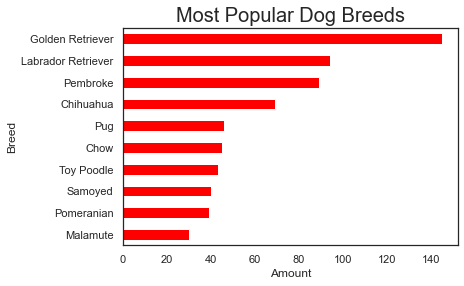

In [89]:
pop_breeds = wrd_clean['dog_breed'].value_counts()[0:10].sort_values(axis = 0, ascending = True)
pop_breeds.plot(kind = 'barh', color = ['red'])
plt.title('Most Popular Dog Breeds', size = 20)
plt.xlabel('Amount', size = 12)
plt.ylabel('Breed', size = 12)
plt.savefig('pop_breeds.jpg')

#### Analysis:
> It looks like the golden retriever is the most popular breed in this data set, with a labrador retriever coming in second, and Pembrokes coming in 3rd place. But we all knew Twitter loves golden retrievers right?

### Focused Visualization B: Retweets vs Favorites (Scatter Plot)

***How correlated are tweets that have been retweeted and tweets that have favorited***

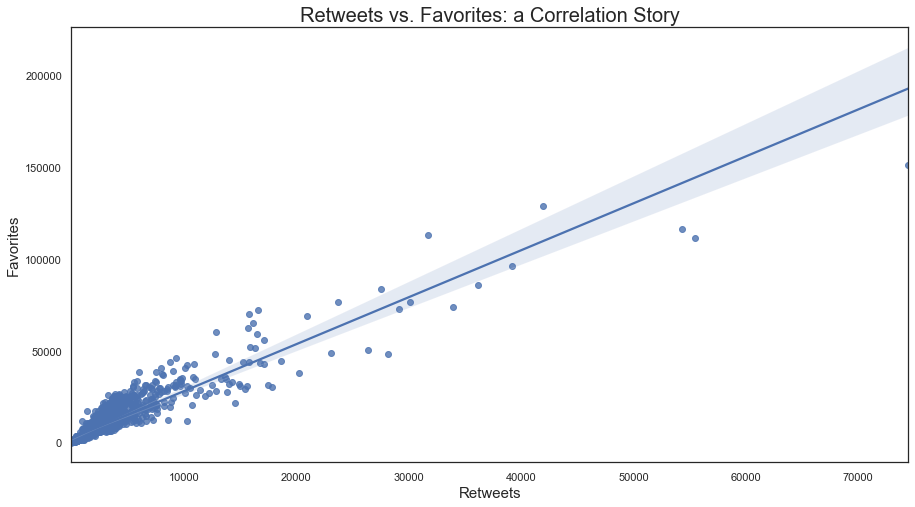

In [90]:
# creating a seaborn regplot
plt.figure(figsize = (15,8))
plt.title('Retweets vs. Favorites: a Correlation Story', size = 20)
sns.regplot(x = 'retweet_count', y = 'favorite_count', data = wrd_clean)
plt.ylabel('Favorites', size = 15)
plt.xlabel('Retweets', size = 15)
plt.savefig('rvf.jpg')

#### Analysis:
> It does look like there is a correlation. The more retweets tweets get, the more favorites it'll get as well. Or at least, thats what the data shows. I'm not entirely it works all that in real life twitter sadly.

### Focused Visualization C: Ratings Distribution (Pie Chart)
***What is the rating breakdown of this dataset?***

In [91]:
# displaying ratings
wrd_clean.rating_numerator.value_counts()

12    448
10    418
11    396
13    256
14     35
Name: rating_numerator, dtype: int64

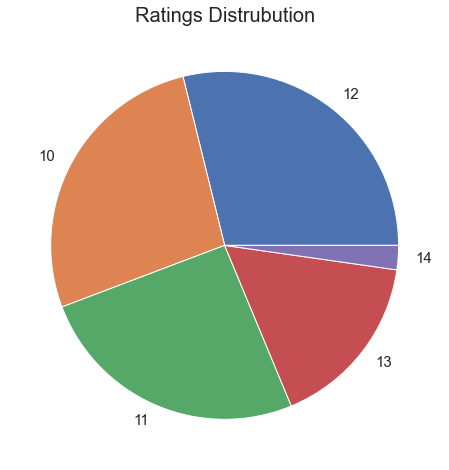

In [92]:
# creating pie chart
plt.title('Ratings Distrubution', size = 20)
wrd_clean['rating_numerator'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15)
plt.ylabel('')
plt.savefig('ratings.jpg');

#### Analysis:
> Looks like the rating that was given the most was a 12/10. Sounds like there are a lot of good heckin' doggos in this dataset!

### General Visualization 

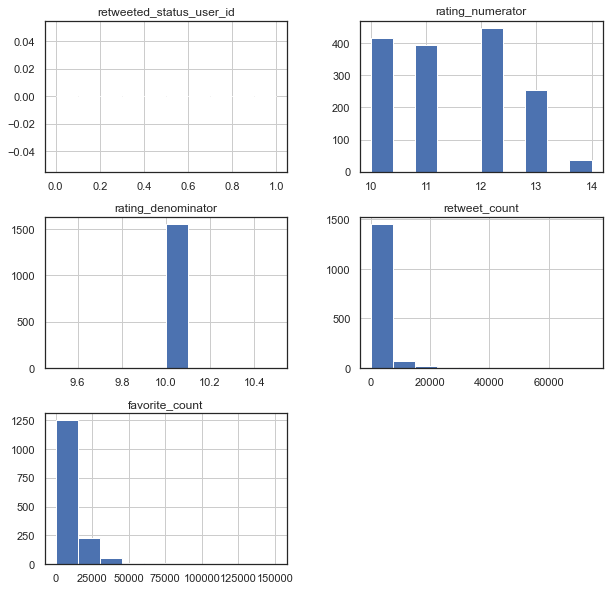

In [93]:
# histogram
wrd_clean.hist(figsize = (10,10));

### Analysis of Data Can Be Found via Wrangle_Report.pdf & Act_Report.pdf